In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

In [2]:
df= pd.read_csv("segmentation data.csv")

In [3]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df.shape

(2000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [6]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df = df.drop(columns=[c for c in df.columns if c.lower() == "id"], errors="ignore")
print("\nColumns after dropping ID:\n", df.columns.tolist())


Columns after dropping ID:
 ['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']


In [9]:
for col in ['Sex', 'Marital status','Education', 'Occupation', 'Settlement size']:
    print(f"\n{col} counts:")
    print(df[col].value_counts())



Sex counts:
Sex
0    1086
1     914
Name: count, dtype: int64

Marital status counts:
Marital status
0    1007
1     993
Name: count, dtype: int64

Education counts:
Education
1    1386
2     291
0     287
3      36
Name: count, dtype: int64

Occupation counts:
Occupation
1    1113
0     633
2     254
Name: count, dtype: int64

Settlement size counts:
Settlement size
0    989
1    544
2    467
Name: count, dtype: int64


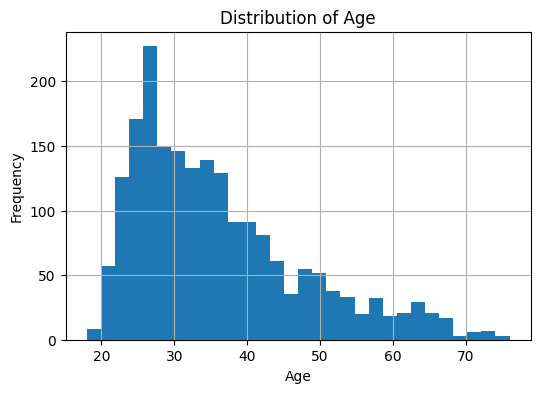

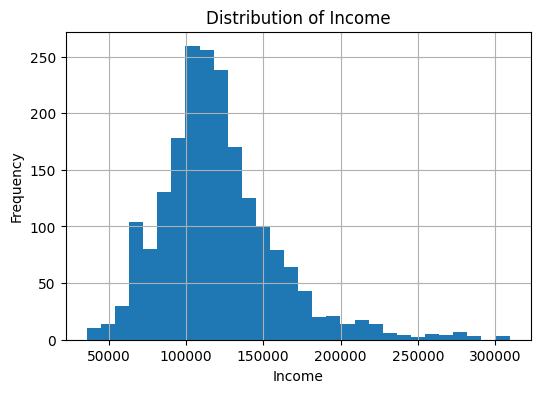

In [10]:
for col in ['Age','Income']:
    plt.figure(figsize=(6,4))
    df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


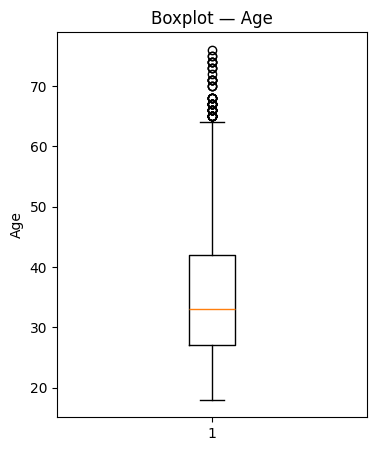

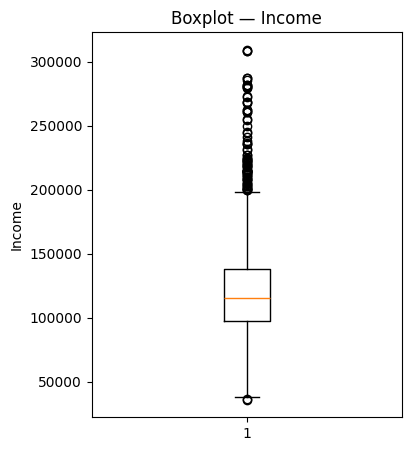

In [11]:
for col in ['Age','Income']:
    plt.figure(figsize=(4,5))
    plt.boxplot(df[col], vert=True)
    plt.title(f"Boxplot — {col}")
    plt.ylabel(col)
    plt.show()


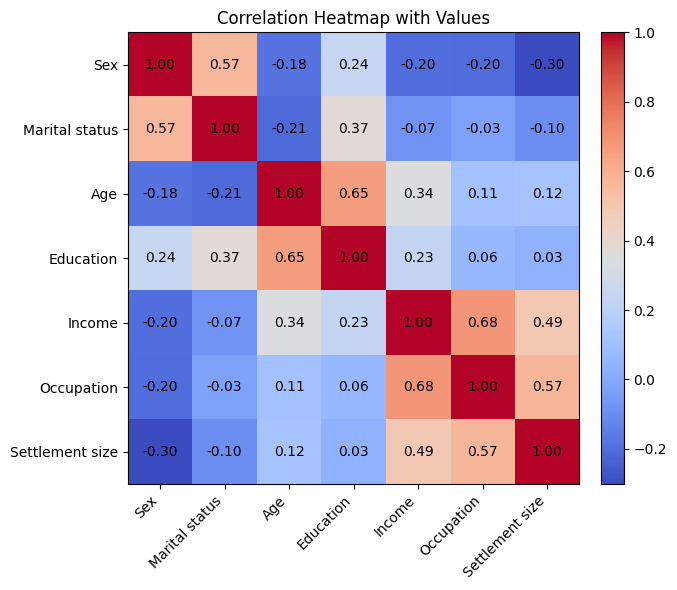

In [12]:
corr = df.corr()
plt.figure(figsize=(7,6))
im = plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", 
                 ha="center", va="center", color="black")

plt.title("Correlation Heatmap with Values")
plt.tight_layout()
plt.show()


C:\Users\FH\AppData\Local\Temp\ipykernel_34184\455968129.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_means = df.groupby(age_bins)["Income"].mean()


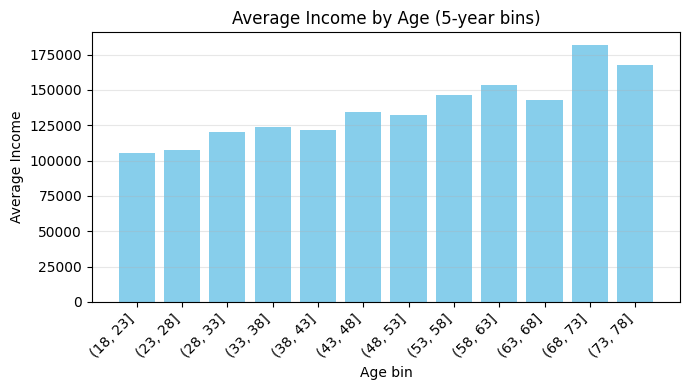

In [13]:
age_bins = pd.cut(df["Age"], bins=np.arange(df["Age"].min(), df["Age"].max()+5, 5))
age_means = df.groupby(age_bins)["Income"].mean()
plt.figure(figsize=(7,4))
plt.bar(age_means.index.astype(str), age_means.values, color="skyblue")
plt.title("Average Income by Age (5-year bins)")
plt.xlabel("Age bin")
plt.ylabel("Average Income")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

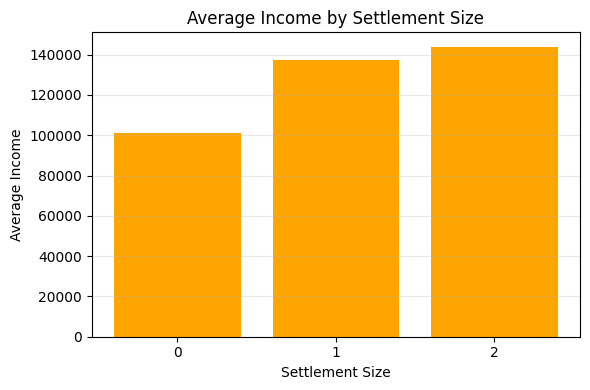

In [14]:
sett_means = df.groupby("Settlement size")["Income"].mean()
plt.figure(figsize=(6,4))
plt.bar(sett_means.index.astype(str), sett_means.values, color="orange")
plt.title("Average Income by Settlement Size")
plt.xlabel("Settlement Size")
plt.ylabel("Average Income")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

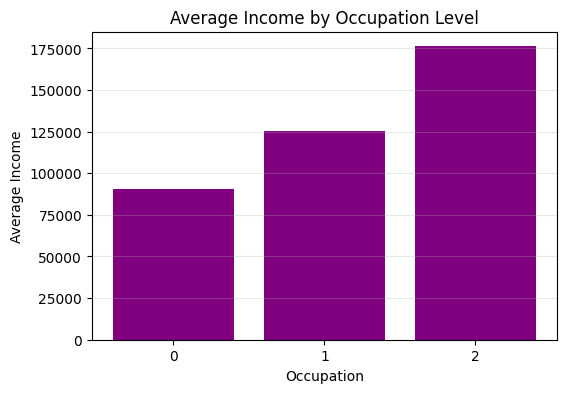

Average Income by Occupation:
Occupation
0     90837.232227
1    125474.473495
2    176203.862205
Name: Income, dtype: float64


In [15]:
occ_income = df.groupby("Occupation")["Income"].mean()
plt.figure(figsize=(6,4))
plt.bar(occ_income.index.astype(str), occ_income.values, color="purple")
plt.title("Average Income by Occupation Level")
plt.xlabel("Occupation")
plt.ylabel("Average Income")
plt.grid(axis="y", alpha=0.3)
plt.show()

print("Average Income by Occupation:")
print(occ_income)


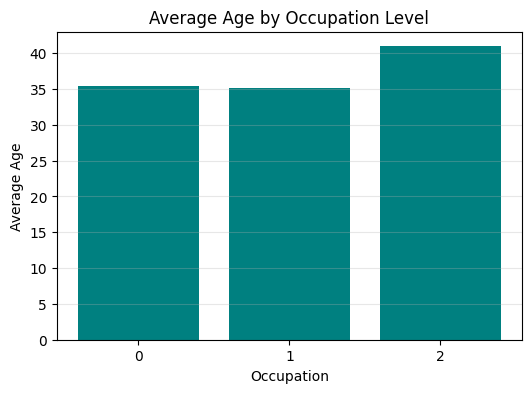

Average Age by Occupation:
Occupation
0    35.366509
1    35.069182
2    40.940945
Name: Age, dtype: float64


In [16]:
occ_age = df.groupby("Occupation")["Age"].mean()
plt.figure(figsize=(6,4))
plt.bar(occ_age.index.astype(str), occ_age.values, color="teal")
plt.title("Average Age by Occupation Level")
plt.xlabel("Occupation")
plt.ylabel("Average Age")
plt.grid(axis="y", alpha=0.3)
plt.show()

print("Average Age by Occupation:")
print(occ_age)


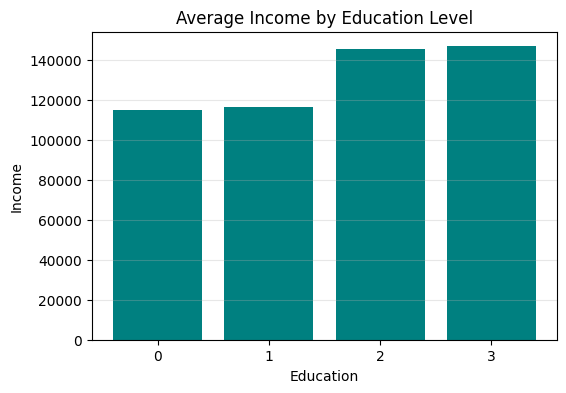

Average Income by Education:
Education
0    115068.212544
1    116367.720058
2    145405.982818
3    146818.333333
Name: Income, dtype: float64


In [17]:
edu_inc = df.groupby("Education")["Income"].mean()
plt.figure(figsize=(6,4))
plt.bar(edu_inc.index.astype(str), edu_inc.values, color="teal")
plt.title("Average Income by Education Level")
plt.xlabel("Education")
plt.ylabel("Income")
plt.grid(axis="y", alpha=0.3)
plt.show()

print("Average Income by Education:")
print(edu_inc)


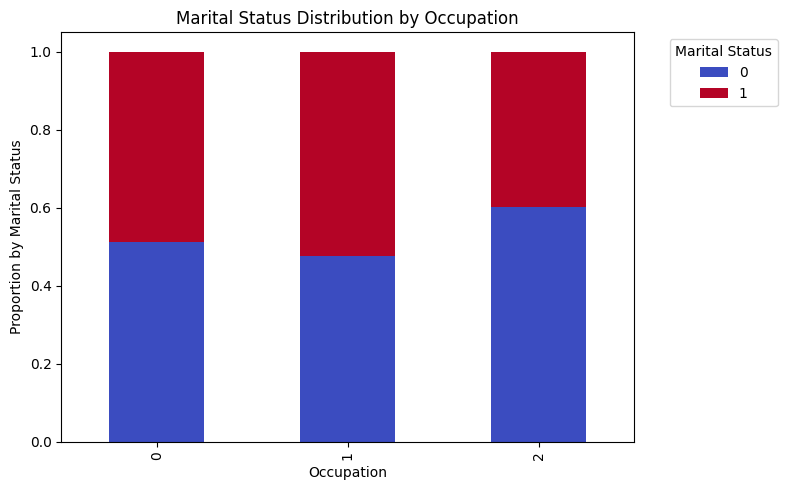

In [18]:
occ_mar = pd.crosstab(df["Occupation"], df["Marital status"], normalize='index')
occ_mar.plot(kind="bar", stacked=True, figsize=(8,5), colormap="coolwarm")
plt.title("Marital Status Distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Proportion by Marital Status")
plt.legend(title="Marital Status", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


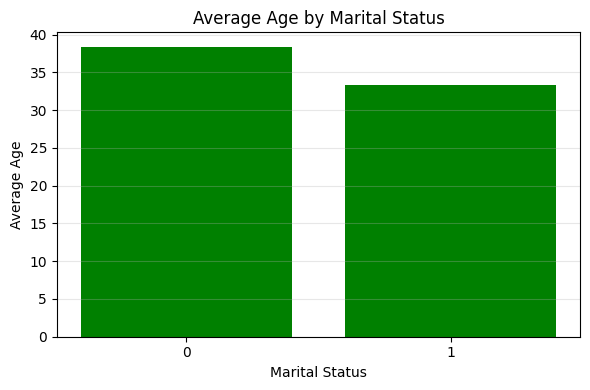

In [19]:
ms_means = df.groupby("Marital status")["Age"].mean()
plt.figure(figsize=(6,4))
plt.bar(ms_means.index.astype(str), ms_means.values, color="green")
plt.title("Average Age by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Average Age")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# **Customer Demographics & Income Analysis**

This report summarizes the analysis of demographic, income, education, occupation, and settlement data, highlighting key patterns and relationships among variables.

---

## **1. Distribution of Age**
- The age distribution is **right-skewed** with most customers between **20–40 years old**.
- A clear **peak around 25–30 years** shows this is the largest age group.
- Customers aged **50+** represent a smaller proportion, indicating a younger customer base overall.

---

## **2. Distribution of Income**
- Income is **heavily right-skewed**, with most customers earning **80,000–150,000**.
- **High-income outliers** above 200,000 exist, raising the overall mean.
- The **median income** is lower than the mean because of the skewed distribution.

---

## **3. Correlation Heatmap**
Key correlations:
- **Age & Education (0.65):** Older customers tend to have **higher education levels**.
- **Income & Occupation (0.68):** Occupation strongly influences income; higher job categories earn more.
- **Income & Settlement Size (0.49):** Urban customers in bigger cities earn higher incomes.

---

## **4. Average Income by Age (5-Year Bins)**
- Income generally **increases with age**, peaking in the **60–70** range.
- Younger customers earn less due to **entry-level positions** and **lower experience**.
- Post-retirement incomes remain relatively high, possibly due to **pensions/investments**.

---

## **5. Average Income by Settlement Size**
- **Urbanization effect** is visible:  
  - **Larger cities (Size 2)** → highest incomes  
  - **Medium towns (Size 1)** → moderate incomes  
  - **Rural areas (Size 0)** → lowest incomes  

---

## **6. Average Income by Occupation Level**
- **Higher occupation levels** correspond to **higher average incomes**.  
- Customers in **Occupation 2** earn **nearly double** compared to those in **Occupation 0**.  
- This confirms that **career progression** directly correlates with **earning power**.  

---

## **7. Average Age by Occupation Level**
- Customers in **higher occupation levels** tend to be **older on average**, especially **Occupation 2**.  
- Indicates **career advancement** typically comes with **age and experience**.  

---

## **8. Marital Status Distribution by Occupation**
- **Occupation 2** workers have a **larger share of single individuals** compared to married ones.  
- **Occupation 0 & 1** (lower and mid-level occupations) have a **higher proportion of married individuals**.  
- This suggests that **higher occupation levels** might be associated with **delayed marriage** or a **greater focus on career before marriage**.

---

## **9. Average Age by Marital Status**
- **Marital status is hierarchical**:  
  - **0 = Single**  
  - **1 = Married (higher)**  
- However, the chart shows **single individuals (0) have a higher average age (~38 years)** than married ones (~33 years).  


---

## **10. Boxplots of Age & Income**
- **Age Boxplot:** Younger outliers (<20) and older outliers (>60) present.
- **Income Boxplot:** High-income outliers (>200,000) visible; most incomes cluster around **100,000–150,000**.




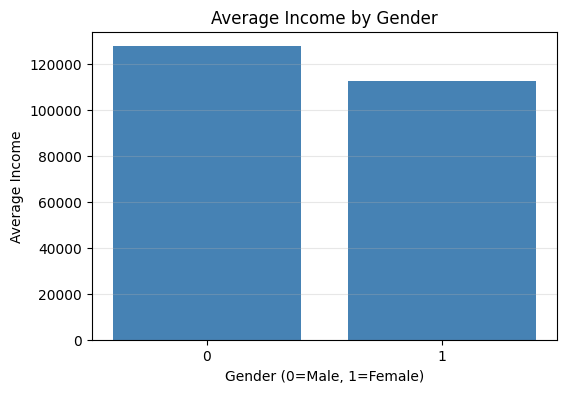

Average Income by Gender:
Sex
0    127775.225599
1    112850.047046
Name: Income, dtype: float64


In [20]:
gender_income = df.groupby("Sex")["Income"].mean()
plt.figure(figsize=(6,4))
plt.bar(gender_income.index.astype(str), gender_income.values, color="steelblue")
plt.title("Average Income by Gender")
plt.xlabel("Gender (0=Male, 1=Female)")
plt.ylabel("Average Income")
plt.grid(axis="y", alpha=0.3)
plt.show()

print("Average Income by Gender:")
print(gender_income)


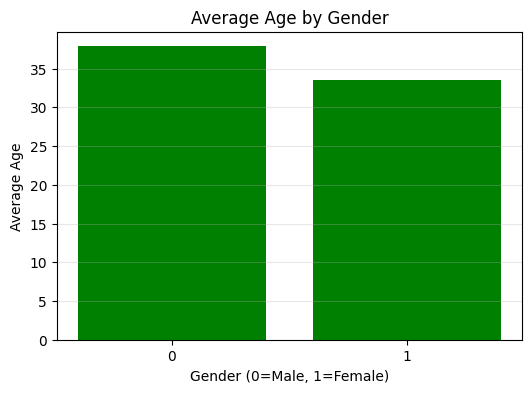

Average Age by Gender:
Sex
0    37.874770
1    33.573304
Name: Age, dtype: float64


In [21]:
gender_age = df.groupby("Sex")["Age"].mean()
plt.figure(figsize=(6,4))
plt.bar(gender_age.index.astype(str), gender_age.values, color="green")
plt.title("Average Age by Gender")
plt.xlabel("Gender (0=Male, 1=Female)")
plt.ylabel("Average Age")
plt.grid(axis="y", alpha=0.3)
plt.show()

print("Average Age by Gender:")
print(gender_age)


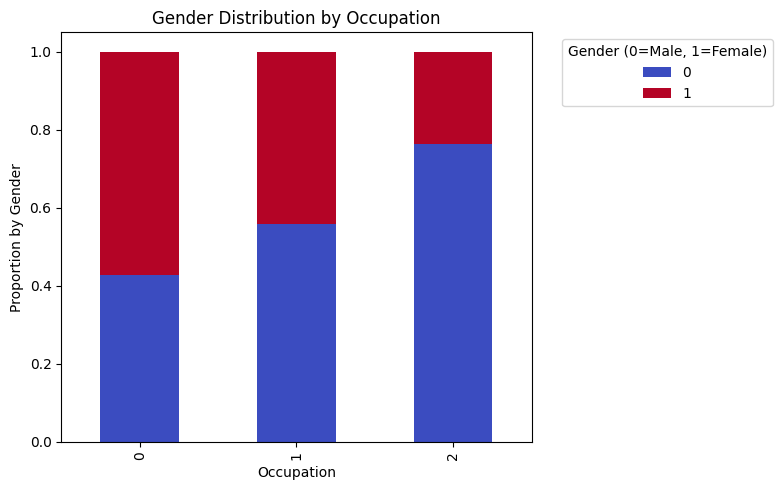

In [22]:
gender_occ = pd.crosstab(df["Occupation"], df["Sex"], normalize='index')
gender_occ.plot(kind="bar", stacked=True, figsize=(8,5), colormap="coolwarm")
plt.title("Gender Distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Proportion by Gender")
plt.legend(title="Gender (0=Male, 1=Female)", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


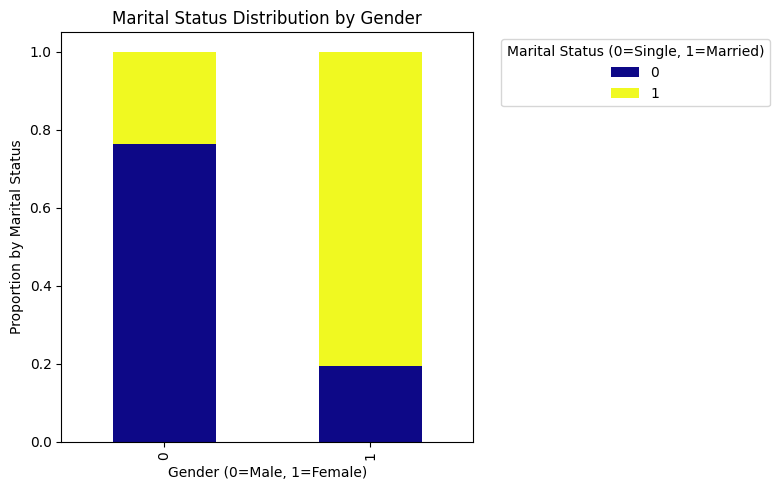

In [23]:
gender_mar = pd.crosstab(df["Sex"], df["Marital status"], normalize='index')
gender_mar.plot(kind="bar", stacked=True, figsize=(8,5), colormap="plasma")
plt.title("Marital Status Distribution by Gender")
plt.xlabel("Gender (0=Male, 1=Female)")
plt.ylabel("Proportion by Marital Status")
plt.legend(title="Marital Status (0=Single, 1=Married)", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## **Gender Analysis**

### **Average Income by Gender**
- **Males (0)** have a **higher average income** than females (1) in this dataset.

---

### **Average Age by Gender**
- **Males (0)** have a **slightly higher average age** than females (1).

---

### **Gender Distribution by Occupation**
- **Higher occupation levels (2)** have a **larger proportion of males (0)**.
- Lower occupation levels (0) have **more females (1)** proportionally.

---

### **Marital Status Distribution by Gender**
- **Males (0)** have a **higher proportion of married individuals** compared to females (1).
- **Females (1)** have a **higher proportion of singles** in this dataset.


In [24]:
features = df.columns.tolist()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

print("Data prepared. Shape:", X_scaled.shape)

Data prepared. Shape: (2000, 7)


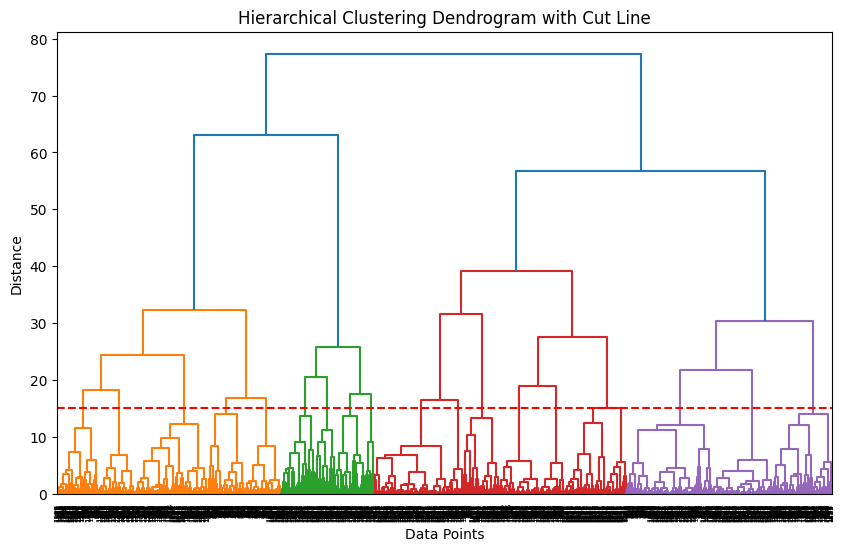

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X_scaled, method='ward')


plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)


plt.axhline(y=15, color='red', linestyle='--')  
plt.title("Hierarchical Clustering Dendrogram with Cut Line")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

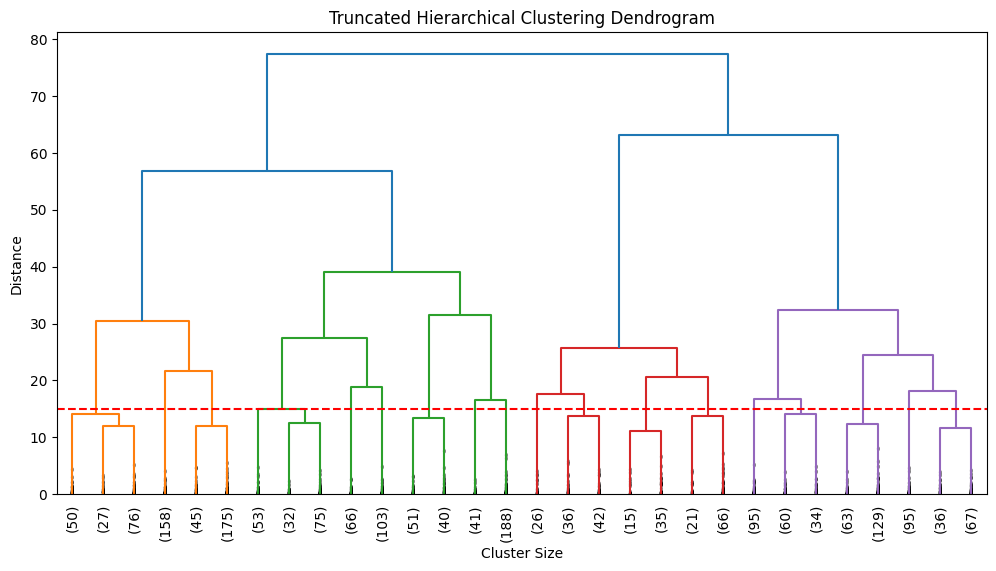

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage


plt.figure(figsize=(12, 6))
dendrogram(linkage(X_scaled, method='ward'),
           truncate_mode='lastp',  
           p=30,                   
           leaf_rotation=90.,      
           leaf_font_size=10.,     
           show_contracted=True)

plt.axhline(y=15, color='red', linestyle='--')  
plt.title("Truncated Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()


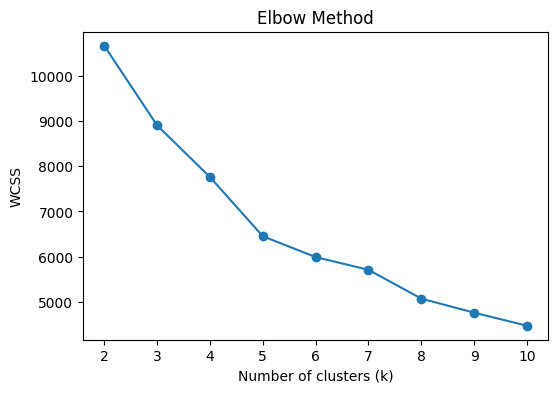

In [27]:
from sklearn.cluster import KMeans

wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [28]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", np.round(pca.explained_variance_ratio_, 3))


Explained variance ratio: [0.357 0.263]


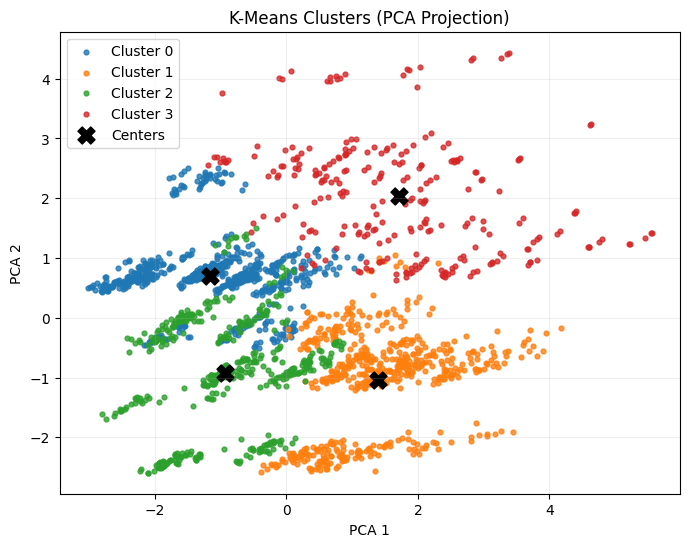

In [29]:

k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for c in range(k):
    plt.scatter(X_pca[clusters==c,0], X_pca[clusters==c,1], 
                label=f"Cluster {c}", s=12, alpha=0.8)  


plt.scatter(pca.transform(kmeans.cluster_centers_)[:,0],
            pca.transform(kmeans.cluster_centers_)[:,1],
            color='black', marker='X', s=150, label='Centers')

plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(alpha=0.2)
plt.show()


In [30]:
pca3 = PCA(n_components=3, random_state=42)
X_pca3 = pca3.fit_transform(X_scaled)
centers_pca3 = pca3.transform(kmeans.cluster_centers_)

print("PCA 3 components explained variance ratio:",
      np.round(pca3.explained_variance_ratio_, 3),
      " → total =", np.round(pca3.explained_variance_ratio_.sum(), 3))


PCA 3 components explained variance ratio: [0.357 0.263 0.188]  → total = 0.808


In [31]:
import plotly.express as px
pca3 = PCA(n_components=3, random_state=42)
X_pca3 = pca3.fit_transform(X_scaled)


df_plot = pd.DataFrame(X_pca3, columns=['PC1','PC2','PC3'])
df_plot["Cluster"] = clusters.astype(str)


fig = px.scatter_3d(df_plot, x='PC1', y='PC2', z='PC3', color='Cluster',
                    title="Interactive 3D PCA Clusters",
                    opacity=0.7, size_max=5)

fig.update_traces(marker=dict(size=4))
fig.show()

In [32]:
sil_score = silhouette_score(X_scaled, clusters)


db_score = davies_bouldin_score(X_scaled, clusters)

In [33]:
print(f"Silhouette Score = {sil_score:.3f}")
print(f"Davies-Bouldin Index = {db_score:.3f}")  

Silhouette Score = 0.269
Davies-Bouldin Index = 1.331


In [34]:
k = 4
model = AgglomerativeClustering(n_clusters=k, linkage="ward")  
labels = model.fit_predict(X_scaled)

sil = silhouette_score(X_scaled, labels)          
db  = davies_bouldin_score(X_scaled, labels)     
print(f"Silhouette={sil:.3f}  DB={db:.3f}")

Silhouette=0.251  DB=1.341


In [35]:

numeric_feats = ["Age", "Income"]
categorical_feats = ["Education", "Occupation", "Settlement size", "Sex", "Marital status"]


df_with_clusters = df.copy()
df_with_clusters["Cluster"] = clusters  


numeric_means = df_with_clusters.groupby("Cluster")[numeric_feats].mean().round(1)


categorical_modes = df_with_clusters.groupby("Cluster")[categorical_feats] \
                                    .agg(lambda x: x.value_counts().index[0])


cluster_summary = pd.concat([numeric_means, categorical_modes], axis=1)

print("\nCluster Summary (Mean for numeric, Mode for categorical):")
print(cluster_summary)



Cluster Summary (Mean for numeric, Mode for categorical):
          Age    Income  Education  Occupation  Settlement size  Sex  \
Cluster                                                                
0        29.0  105759.1          1           1                0    1   
1        35.6  141218.2          1           1                2    0   
2        35.6   97859.9          1           0                0    0   
3        55.7  158338.4          2           1                1    1   

         Marital status  
Cluster                  
0                     1  
1                     0  
2                     0  
3                     1  


In [36]:
df_clusters = df.copy()
df_clusters["Cluster"] = labels


education_map = {0:"Low", 1:"High school", 2:"Graduate", 3:"PhD"}  
occupation_map = {0:"Low-skill", 1:"Mid-skill", 2:"High-skill"}
settlement_map = {0:"Rural", 1:"Town", 2:"City"}
sex_map = {0:"male", 1:"Female"}              
marital_map = {0:"Single/Unmarried", 1:"Married"} 

numeric_feats = ["Age", "Income"]
categorical_feats = ["Education", "Occupation", "Settlement size", "Sex", "Marital status"]

In [37]:
num_profile = df_clusters.groupby("Cluster")[numeric_feats].mean().round(1)


mode_profile = df_clusters.groupby("Cluster")[categorical_feats] \
                          .agg(lambda s: s.value_counts().idxmax())


prop_tables = {}
for cat in categorical_feats:
    prop = pd.crosstab(df_clusters["Cluster"], df_clusters[cat], normalize='index').round(3)
    prop_tables[cat] = prop  


In [38]:
age_q = df_clusters["Age"].quantile([0.33, 0.66]).values
inc_q = df_clusters["Income"].quantile([0.33, 0.66]).values

def bucket(value, q):
    if value < q[0]: return "Low"
    if value < q[1]: return "Mid"
    return "High"

def make_cluster_name(row, mode_row):
    age_bucket = bucket(row["Age"], age_q)
    inc_bucket = bucket(row["Income"], inc_q)


    edu_txt = education_map.get(mode_row["Education"], f"Edu{mode_row['Education']}")
    occ_txt = occupation_map.get(mode_row["Occupation"], f"Occ{mode_row['Occupation']}")
    set_txt = settlement_map.get(mode_row["Settlement size"], f"Set{mode_row['Settlement size']}")

   
    return f"{age_bucket}-Age {set_txt} {inc_bucket}-Income ({occ_txt})"


In [39]:
def top_share_str(cat, cluster_id):
   
    prop = prop_tables[cat].loc[cluster_id]
    top_code = prop.idxmax()
    top_pct = prop.max()
    
    m = {"Education": education_map, "Occupation": occupation_map,
         "Settlement size": settlement_map, "Sex": sex_map,
         "Marital status": marital_map}[cat]
    return f"{m.get(top_code, top_code)} — {int(round(top_pct*100))}%"


markdown_blocks = []
sizes = df_clusters["Cluster"].value_counts().sort_index()

for cid in sorted(df_clusters["Cluster"].unique()):
    row_num = num_profile.loc[cid]
    row_mode = mode_profile.loc[cid]
    name = make_cluster_name(row_num, row_mode)

    edu_str  = top_share_str("Education", cid)
    occ_str  = top_share_str("Occupation", cid)
    set_str  = top_share_str("Settlement size", cid)
    sex_str  = top_share_str("Sex", cid)
    mar_str  = top_share_str("Marital status", cid)

    block = f"""
### **Cluster {cid}: {name}**
- **Size:** {sizes[cid]} customers
- **Age (mean):** {row_num['Age']:.1f}  |  **Income (mean):** {row_num['Income']:.0f}
- **Dominant Education:** {edu_str}
- **Dominant Occupation:** {occ_str}
- **Location Mix:** {set_str}
- **Gender Mix:** {sex_str}
- **Marital Mix:** {mar_str}
"""
    markdown_blocks.append(block.strip())

print("\n\n".join(markdown_blocks))


### **Cluster 0: Mid-Age Rural Low-Income (Low-skill)**
- **Size:** 649 customers
- **Age (mean):** 34.6  |  **Income (mean):** 90807
- **Dominant Education:** High school — 71%
- **Dominant Occupation:** Low-skill — 90%
- **Location Mix:** Rural — 98%
- **Gender Mix:** Female — 64%
- **Marital Mix:** Single/Unmarried — 56%

### **Cluster 1: Mid-Age City High-Income (Mid-skill)**
- **Size:** 579 customers
- **Age (mean):** 36.8  |  **Income (mean):** 137369
- **Dominant Education:** High school — 67%
- **Dominant Occupation:** Mid-skill — 74%
- **Location Mix:** City — 43%
- **Gender Mix:** male — 100%
- **Marital Mix:** Single/Unmarried — 100%

### **Cluster 2: High-Age Town High-Income (Mid-skill)**
- **Size:** 241 customers
- **Age (mean):** 54.6  |  **Income (mean):** 163925
- **Dominant Education:** Graduate — 84%
- **Dominant Occupation:** Mid-skill — 61%
- **Location Mix:** Town — 43%
- **Gender Mix:** male — 50%
- **Marital Mix:** Married — 72%

### **Cluster 3: Mid-Age Rural M

In [40]:
for cat in ["Education", "Occupation", "Settlement size","Sex", "Marital status"]:
    print(f"\nDistribution for {cat}:")
    print(pd.crosstab(df_with_clusters["Cluster"], df_with_clusters[cat], normalize="index").round(2)*100)



Distribution for Education:
Education     0     1     2     3
Cluster                          
0           0.0  93.0   7.0   0.0
1          27.0  73.0   0.0   0.0
2          29.0  67.0   4.0   0.0
3           0.0   1.0  86.0  14.0

Distribution for Occupation:
Occupation     0     1     2
Cluster                     
0           38.0  60.0   2.0
1            2.0  69.0  29.0
2           67.0  33.0   0.0
3           16.0  56.0  29.0

Distribution for Settlement size:
Settlement size     0     1     2
Cluster                          
0                67.0  24.0   9.0
1                 2.0  44.0  54.0
2                96.0   4.0   0.0
3                25.0  40.0  36.0

Distribution for Sex:
Sex         0     1
Cluster            
0        15.0  85.0
1        97.0   3.0
2        65.0  35.0
3        50.0  50.0

Distribution for Marital status:
Marital status     0      1
Cluster                    
0                0.0  100.0
1               83.0   17.0
2               98.0    2.0
3      

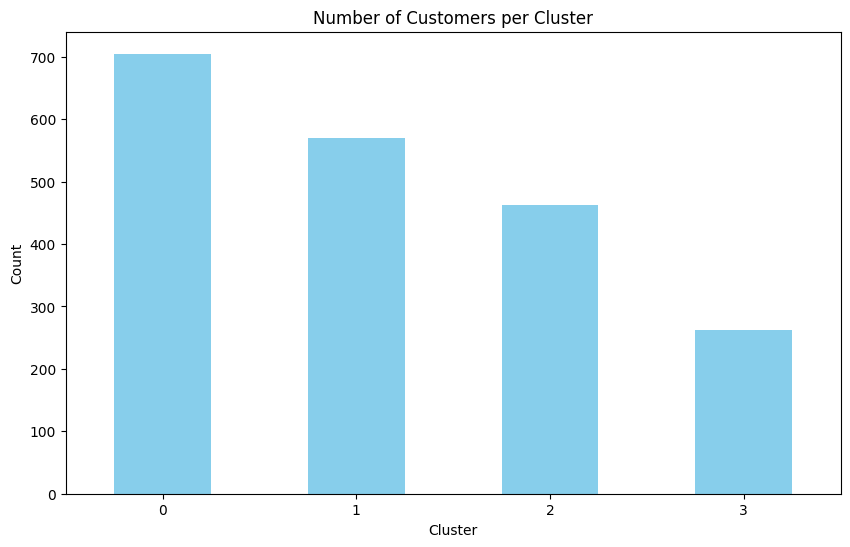

In [41]:
plt.figure(figsize=(10,6))
df_with_clusters["Cluster"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Number of Customers per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

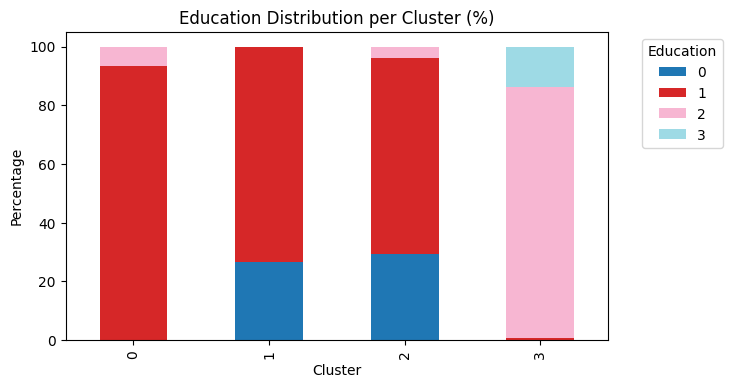

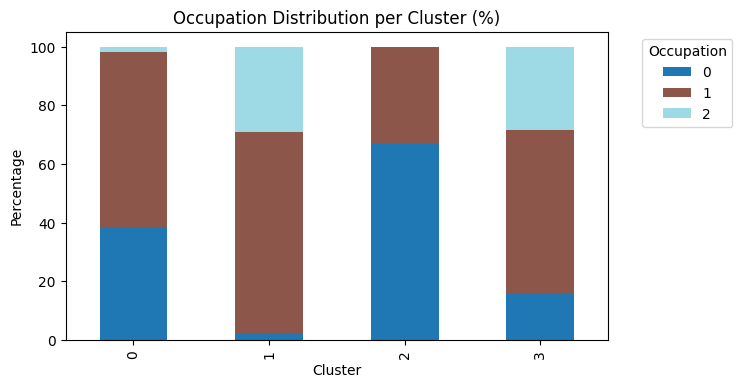

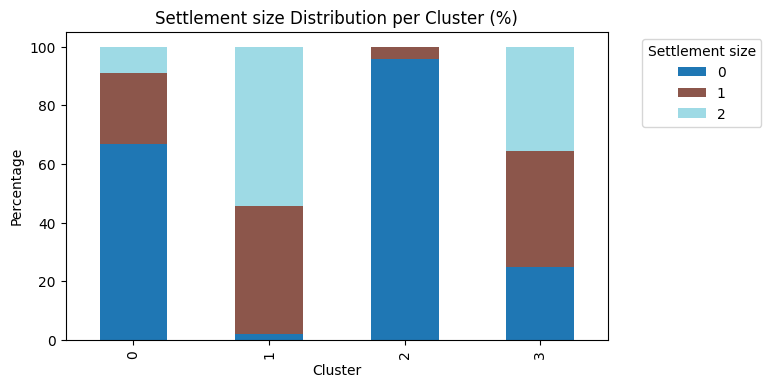

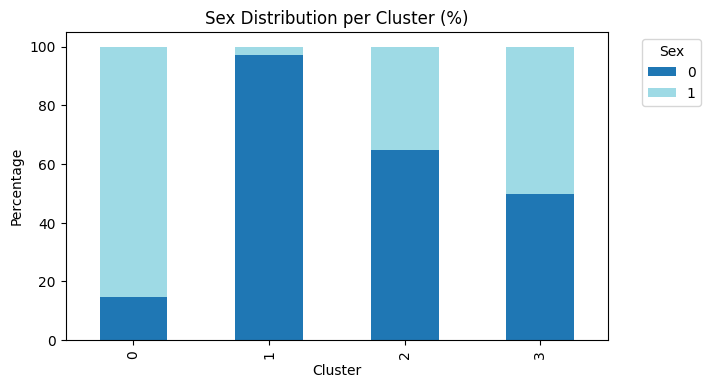

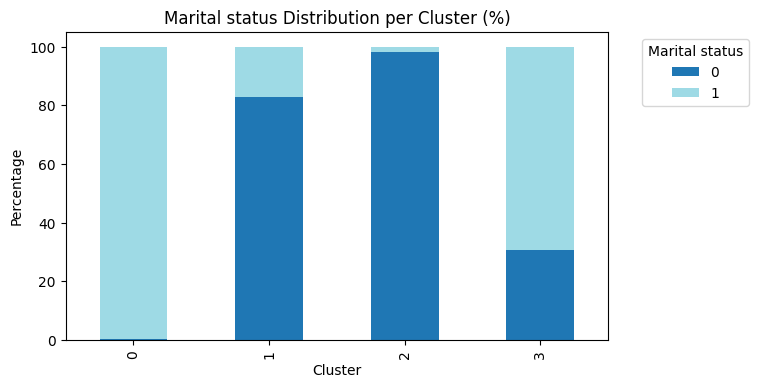

In [42]:
categorical_feats = ["Education", "Occupation", "Settlement size", "Sex", "Marital status"]

for cat in categorical_feats:
    crosstab = pd.crosstab(df_with_clusters["Cluster"], df_with_clusters[cat], normalize="index") * 100
    crosstab.plot(kind="bar", stacked=True, figsize=(7,4), colormap="tab20")
    plt.title(f"{cat} Distribution per Cluster (%)")
    plt.ylabel("Percentage")
    plt.legend(title=cat, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


In [43]:
def assign_generation(age):
    if age <= 28:
        return "Gen Z"
    elif 29 <= age <= 44:
        return "Millennials"
    elif 45 <= age <= 60:
        return "Gen X"
    elif 61 <= age <= 79:
        return "Baby Boomers"
    else:
        return "Silent Generation"

df_with_clusters["Generation"] = df_with_clusters["Age"].apply(assign_generation)


In [44]:
generation_counts = df_with_clusters["Generation"].value_counts()
print("Generation Counts:\n", generation_counts)

Generation Counts:
 Generation
Millennials     910
Gen Z           669
Gen X           314
Baby Boomers    107
Name: count, dtype: int64


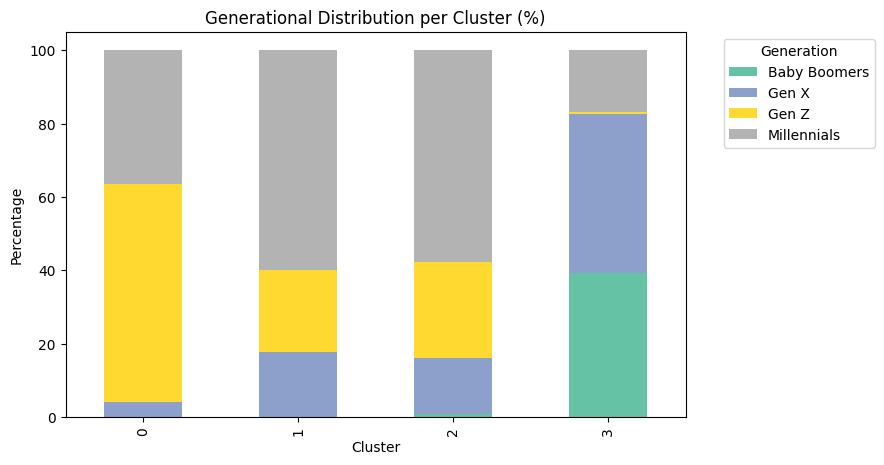

In [45]:
gen_crosstab = pd.crosstab(df_with_clusters["Cluster"], df_with_clusters["Generation"], normalize="index") * 100
gen_crosstab.plot(kind="bar", stacked=True, figsize=(8,5), colormap="Set2")
plt.title("Generational Distribution per Cluster (%)")
plt.ylabel("Percentage")
plt.legend(title="Generation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# **Customer Segmentation Analysis**

## **Elbow Method**
The **Elbow Method** was applied to determine the optimal number of clusters for K-Means by plotting the **Within-Cluster Sum of Squares (WCSS)** for different values of *k*.  
The point where the curve starts to flatten ("elbow") indicates the optimal number of clusters.  

**Result:** The elbow method suggested **k = 4** clusters as the optimal choice.

---

## **Hierarchical Dendrogram**
A **hierarchical clustering dendrogram** was plotted using Ward’s linkage method.  
The **cut line** was used to identify the natural splits in the data.  

**Result:** The dendrogram also supported **4 clusters** as a meaningful segmentation.

---

## **Final Segmentation (K-Means with k = 4)**
After confirming the optimal number of clusters, we applied **K-Means clustering** with **k = 4** on the standardized data.  
Clusters were summarized using:
- **Mean** for numeric features (Age, Income)  
- **Dominant category (mode)** for categorical features (Education, Occupation, Settlement Size, Sex, Marital Status)  

---


## **7. Key Insights**
1. **Cluster 0** → Low-income, rural, low-skill workers; mostly female, single, moderate education levels.  
2. **Cluster 1** → High-income, mid-aged urban males; single, mid-skill occupations, moderate education.  
3. **Cluster 2** → Older, high-income families in towns; graduate-level education, mixed gender, mostly married.  
4. **Cluster 3** → Mid-income, rural, mid-aged married individuals; high proportion of mid-skill workers.  

---



In [46]:
import joblib

joblib.dump(kmeans, "segmentation_model.pkl")

joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']